
# Project: 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ab">A/B Testing</a></li>   
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
INTRODUCTION
Analyze marketing campaign based on sales, location, and other key metrics
Figure out which channels, campaigns, or anything help us predict sale from customers
Scenario
A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

Our first major focus on 3 size of Market campaign:

Small
Medium
Large
>source :
[Kaggle](https://www.kaggle.com/duonghoanvu1/marketing-campaign-fast-food)

Task: Analyse A/B test Results

Credits & Reference:

Hands-On Data Science for Marketing Book , some of the code sources are from the book.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
#reading dataset
df = pd.read_csv('D:\Downloads\Data Sources\A-B Testing\WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [6]:
df.shape

(548, 7)

> There are a total of seven variables in the dataset, 6 Numerical and 1 object , 548 observations

- MarketID:unique identifier for market
- MarketSize:size of market area by sales
- LocationID:unique identifier for store location
- AgeOfStore:age of store in years
- Promotion: one of three promotions that was tested
- week:one of four weeks when the promotions were run
- SalesInThousands:sales amount for specific LocationID, Promotion, and week.

<a id='wrangling'></a>
## Data Wrangling


In [8]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [10]:
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [5]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 

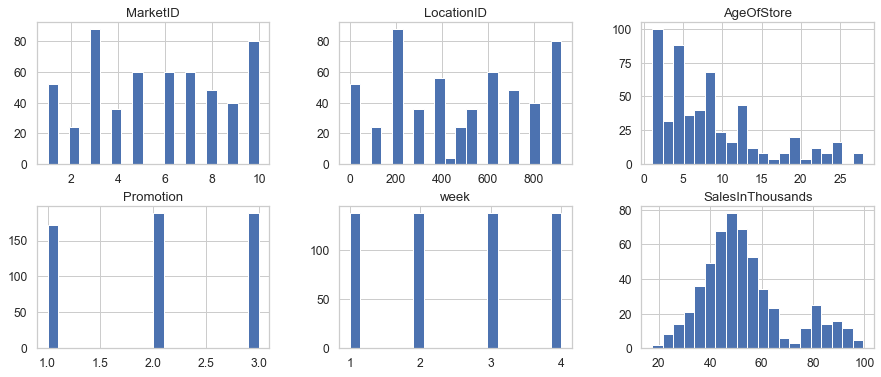

In [11]:
df.hist(bins=20, layout=(2,3), figsize=(15,6));

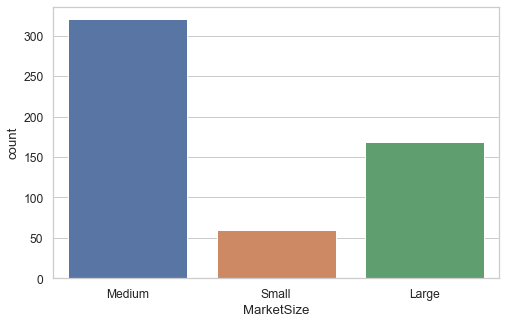

In [12]:
sb.countplot(df['MarketSize']);

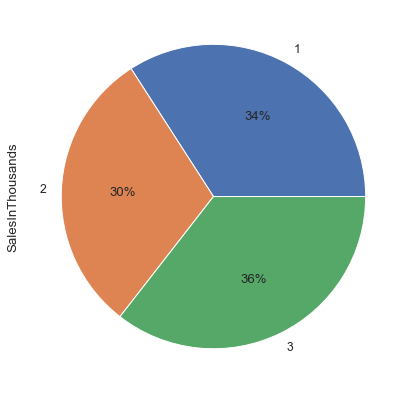

In [16]:
#plotting the sales distribution for different promotion types
ax = df.groupby('Promotion')['SalesInThousands'].sum().plot(kind = 'pie', autopct='%1.0f%%', 
                                                            figsize=(7,7));

> Promotion group 3 has the largest aggregate sales among the three groups

In [18]:
df.groupby(['Promotion', 'MarketSize'])['MarketID'].count().unstack()

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


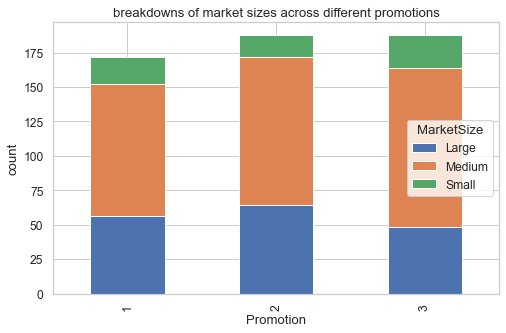

In [20]:
ax =df.groupby(['Promotion', 'MarketSize'])['MarketID'].count().unstack().plot(kind ='bar', 
                                                                               stacked =True)
ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions');

> The medium market size occupies the most among all three promotion groups, while the small market size occupies the least.

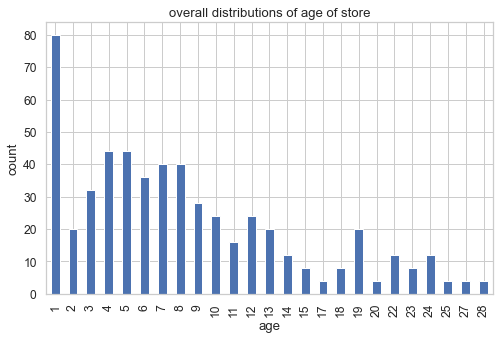

In [23]:
ax = df.groupby('AgeOfStore')['MarketID'].count().plot(kind='bar')
ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store');

> a large number of stores are 1 year old and the majority of stores are 10 years old or less.

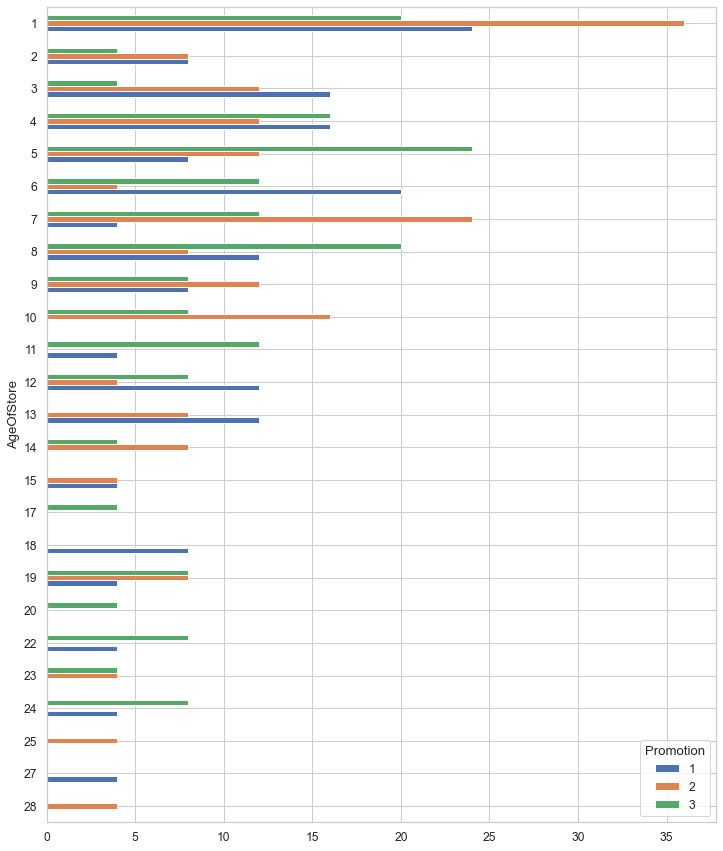

In [29]:
ax =df.groupby(['AgeOfStore','Promotion'])['MarketID'].count().unstack().iloc[::-1].plot(
kind = 'barh', figsize = (12,15));

In [36]:
df.groupby('Promotion')['AgeOfStore'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


> All three test groups seem have similar store age profiles, average ages are 8 to 9 and the majority of the stores (75% of the Data ) are 10–12 years old or younger.

In [34]:
df.groupby(['AgeOfStore','Promotion'])['SalesInThousands'].sum().unstack().fillna(0)

Promotion,1,2,3
AgeOfStore,,,
1,1578.75,1787.16,1307.34
2,608.90,345.39,229.30
3,1060.34,535.86,331.08
4,731.42,640.01,979.83
5,548.50,353.41,1246.11
6,1117.45,197.30,534.45
7,168.76,1325.22,591.17
8,738.50,318.35,962.18
9,427.52,558.88,385.49


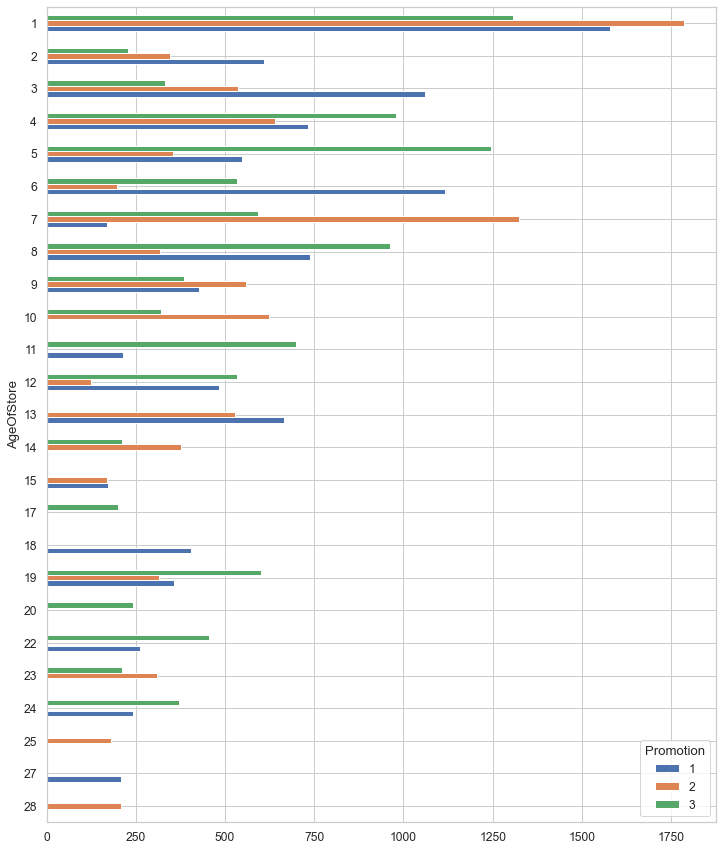

In [37]:
ax =df.groupby(['AgeOfStore','Promotion'])['SalesInThousands'].sum(
).unstack().fillna(0).iloc[::-1].plot(kind ='barh', figsize =(12,15));

> Sales that exceeded 1,000,000 are in stores of younger age =< 7 years

In [40]:
df.groupby(['Promotion','week'])['SalesInThousands'].sum().unstack()

week,1,2,3,4
Promotion,,,,
1,2504.51,2447.97,2527.32,2513.23
2,2243.32,2236.38,2242.94,2175.29
3,2621.48,2629.61,2555.76,2601.67


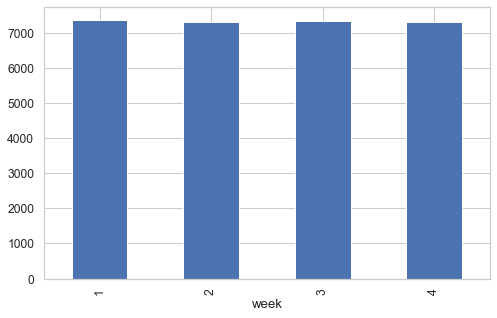

In [44]:
ax =df.groupby('week')['SalesInThousands'].sum().plot(kind ='bar');

In [48]:
df.groupby(['Promotion','MarketSize'])['SalesInThousands'].sum().unstack()

MarketSize,Large,Medium,Small
Promotion,,,
1,4213.21,4576.57,1203.25
2,3860.61,4224.35,812.97
3,3705.79,5274.39,1428.34


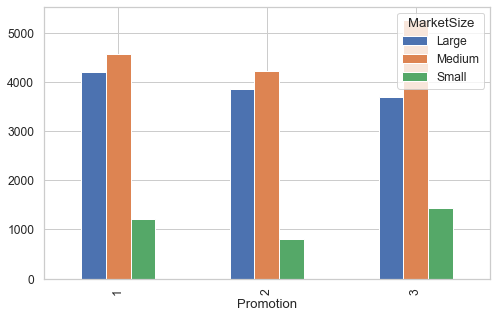

In [49]:
ax =df.groupby(['Promotion','MarketSize'])['SalesInThousands'].sum().unstack().plot(kind='bar');

> The bar chart shows that promotion number 3 for medium sized market exceeded other promotions in terms of Total Sales 

<a id='ab'></a>
### Hypothesis Testing (A/B Testing)

> The sample groups should be similar to each other and are well controlled, which was shown in the distribution of promotions among different stores

In [50]:
from scipy import stats

In [51]:
t, p = stats.ttest_ind(
df.loc[df['Promotion']== 1, 'SalesInThousands'].values,
df.loc[df['Promotion']== 2, 'SalesInThousands'].values, 
equal_var=False)
t, p

(6.42752867090748, 4.2903687179871785e-10)

In [55]:
df.groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

> The average sales (in thousands) for promotion group 1 is about 58.1, and for promotion group 2 it's about 47.33, the market performance for those two promotions is significantly different and as the p-value( very small there's a statistical significance) market promotion number 1 outperforms promotion 2



In [54]:
t, p = stats.ttest_ind(
df.loc[df['Promotion']== 1, 'SalesInThousands'].values,
df.loc[df['Promotion']== 3, 'SalesInThousands'].values, 
equal_var=False)
t, p

(1.5560224307758634, 0.12059147742229478)

> For promotion 1 and 3, there's no statistical significance The computed p-value is much higher than 0.05

> The marketing performance from promotion group 1 is not statistically different from the marketing performance from promotion group 2 eventhough the avg sales are higher than group 3

>Promotion 1 and 3 outperforms promotion 2

<a id='conclusions'></a>
## Conclusions

> EDA findings :
- Promotion group 3 has the largest aggregate sales among the three groups
- The medium market size occupies the most among all three promotion groups, while the small market size occupies the least.
- A large number of stores are 1 year old and the majority of stores are 10 years old or less.
- All three test groups seem have similar store age profiles, average ages are 8 to 9 and the majority of the stores (75% of the Data ) are 10–12 years old or younger.
- Sales that exceeded 1,000,000 are in stores of younger age =< 7 years
- The bar chart shows that promotion number 3 for medium sized market exceeded other promotions in terms of Total Sales 

> Hypothesis Testing Findings:

- Market promotion number 1  and 3 outperforms promotion 2, but The marketing performance from promotion group 1 is not statistically different from the marketing performance from promotion group 2 eventhough the avg sales are higher than group 3 